In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
customer_data = pd.read_csv("./data/Mall_Customers.csv")

# Read the data
customer_data.head()

# Check for null or missing values
customer_data.isna().sum()
customer_data.drop('Genre', axis=1, inplace=True)
customer_data

,CustomerID,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


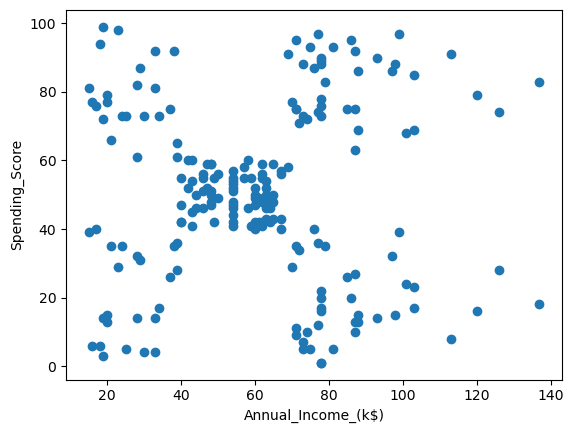

In [130]:
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

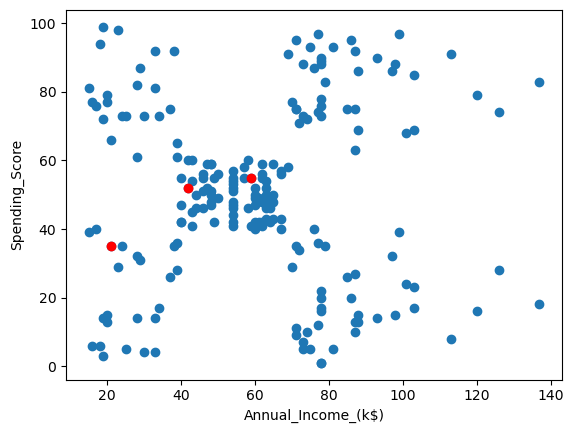

In [131]:
# Set the number of clusters
K = 3
# Select initial centroids randomly
centroids = customer_data.sample(n=K)
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.scatter(centroids['Annual_Income_(k$)'],centroids['Spending_Score'],c='red')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [132]:

# Create a mask to filter out the centroids from the customer_data
mask = customer_data['CustomerID'].isin(centroids.CustomerID.tolist())

# Filter out the centroids from the customer_data
X = customer_data[~mask].copy()  # Create a deep copy of the DataFrame

# Initialize the difference variable
diff = 1

# Initialize the iteration variable
j = 0

# Create a copy of X dataframe
XD = X.copy()

while(diff != 0):
    # Initialize the cluster index
    i = 1
    for index1, row_c in centroids.iterrows():
        # Initialize the Euclidean distance list
        ED = []
        for index2, row_d in XD.iterrows():
            # Calculate the squared difference in Annual Income and Spending Score
            d1 = (row_c["Annual_Income_(k$)"] - row_d["Annual_Income_(k$)"])**2
            d2 = (row_c["Spending_Score"] - row_d["Spending_Score"])**2
            # Calculate the Euclidean distance
            d = np.sqrt(d1 + d2)
            # Append the Euclidean distance to the list
            ED.append(d)
        # Assign the Euclidean distance list to the corresponding column in X dataframe using .loc
        X.loc[:, i] = np.array(ED)
        # Increment the cluster index
        i = i + 1

    # Initialize the cluster list
    C = []
    for index, row in X.iterrows():
        # Initialize the minimum distance
        min_dist = row[1]
        # Initialize the cluster position
        pos = 1
        for k in range(K):
            # Check if the distance is smaller than the minimum distance
            if row[k+1] < min_dist:
                # Update the minimum distance and cluster position
                min_dist = row[k+1]
                pos = k+1
        # Append the cluster position to the list
        C.append(pos)

    # Assign the cluster list to the "Cluster" column in X dataframe using .loc
    X.loc[:, "Cluster"] = C

    # Calculate the new centroids
    centroids_new = X.groupby(["Cluster"]).mean()[["Spending_Score", "Annual_Income_(k$)"]]

    # Calculate the difference between the new and old centroids
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (centroids_new['Spending_Score'] - centroids['Spending_Score']).sum() + (centroids_new['Annual_Income_(k$)'] - centroids['Annual_Income_(k$)']).sum()

    # Update the centroids
    centroids = centroids_new

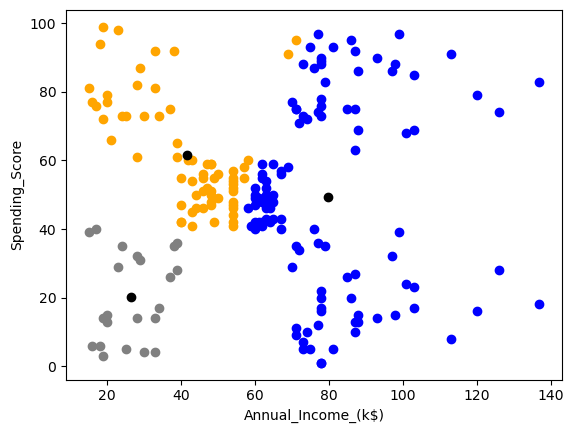

In [133]:
color=['grey','blue','orange']
for k in range(K):
   data=X[X["Cluster"]==k+1]
   plt.scatter(data["Annual_Income_(k$)"],data["Spending_Score"],c=color[k])
plt.scatter(centroids["Annual_Income_(k$)"],centroids["Spending_Score"],c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [134]:
from sklearn.cluster import KMeans
km_sample = KMeans(n_clusters=3)
km_sample.fit(customer_data[['Annual_Income_(k$)','Spending_Score']])

KMeans(n_clusters=3)

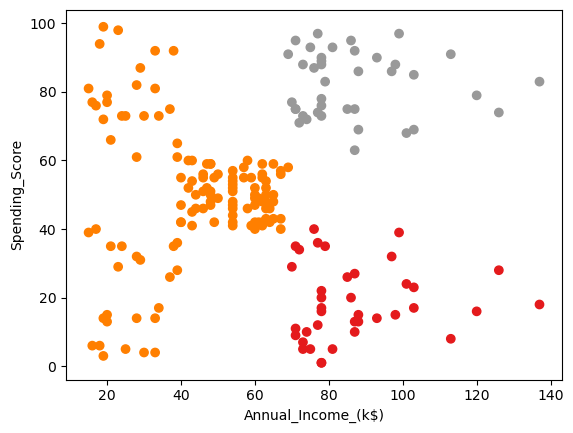

In [136]:
import matplotlib.pyplot as plt
customer_data['label'] = labels_sample
plt.scatter(customer_data['Annual_Income_(k$)'], customer_data['Spending_Score'], c=customer_data['label'], cmap='Set1')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()